In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics # ROC-curve, AUC

import matplotlib.pyplot as plt
import seaborn as sns

# Не показывать FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('loanapp.csv')

In [4]:
data = data.dropna()


<Axes: >

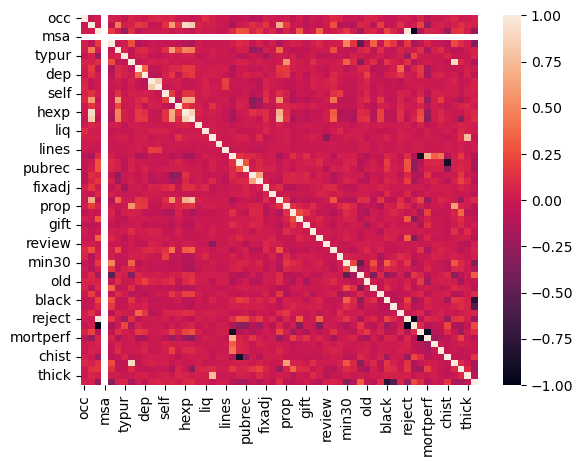

In [5]:
sns.heatmap(data.corr())

<Axes: >

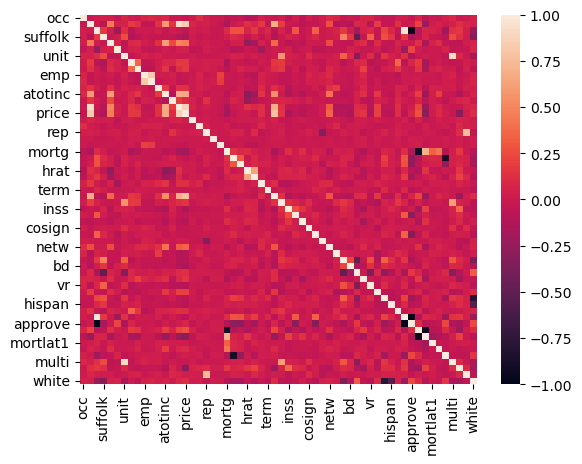

In [13]:
data= data.drop(columns='msa')
sns.heatmap(data.corr())

In [ ]:
np.min( data.corr() )

In [54]:
corr_matrix = data.corr()
col_to_remove =[]
my_min = []
my_max = []
# corr_matrix.columns
for i in corr_matrix.columns:
	my_min.append(np.min(corr_matrix[i].drop(labels=i)))
	my_max.append(np.max(corr_matrix[i].drop(labels=i)))
	# print(np.min(corr_matrix[i].drop(labels=i)), np.max(corr_matrix[i].drop(labels=i)))
	# if np.min(corr_matrix[i].drop(labels=i))==-1 : # or np.max(corr_matrix[i].drop(labels=i))==1:
	# 	col_to_remove.append(i)
# col_to_remove
df = pd.DataFrame({'min':my_min, 'max':my_max}, index=corr_matrix.index)
df

,min,max
occ,-0.102199,0.116757
loanamt,-0.227355,0.915677
action,-0.966189,0.966189
suffolk,-0.514234,0.477711
appinc,-0.262834,0.608750
typur,-0.243535,0.219340
unit,-0.313976,0.910099
married,-0.174019,0.351596
dep,-0.170108,0.351596
emp,-0.093243,0.822976


In [48]:
corr_matrix = data.corr()
col_to_remove =[]
for i in corr_matrix.columns:
	if np.min(corr_matrix[i]) == -1:
		col_to_remove.append(i)
col_to_remove

-0.10219935022326138
-0.22735450175781272
-0.9661889787838341
-0.5142344651780048
-0.2628336983046468
-0.24353522915107165
-0.31397575820065954
-0.17401936193577863
-0.17010819812891892
-0.09324344554774977
-0.06450997673081627
-0.11715852980839815
-0.2901137935344358
-0.2572428622587364
-0.23693558384559374
-0.3224079582824376
-0.05809887759413408
-0.04246361768621858
-0.3223220371451482
-0.029607269860662574
-0.07007943013951999
-0.9010709412034801
-0.896095254197715
-0.2670481217144319
-0.2901137935344358
-0.2104454880739445
-0.18263783368654146
-0.088208115948847
-0.23991650190430644
-0.1350254955401011
-0.18020081327777157
-0.30514238047465125
-0.17444967192875274
-0.11111101222559945
-0.33772319039875853
-0.3223220371451482
-0.1500001522923322
-0.1493551634926671
-0.4985831055336186
-0.16788047736250625
-0.5142344651780048
-0.18772107955554215
-0.3512623900010885
-0.1493551634926671
-0.782611453020532
-0.55362046347832
-0.09127163713633743
-1.0000000000000002
-1.0000000000000002


[]

In [55]:
# data = data.dropna()

y = data['approve']
X = data.drop(columns=['approve', 'reject'])
# Разобьём выборку на обучающую и тестовую 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
clf_logistic = LogisticRegression(penalty=None, random_state=0)
clf_logistic.fit(X_train, y_train)

/Users/nikita/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)